In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# 儲存模型
import joblib

## 解決不平衡樣本
from imblearn.over_sampling import RandomOverSampler # oversampling 過採樣
from imblearn.under_sampling import RandomUnderSampler # undersampling 欠採樣
from imblearn.pipeline import Pipeline
#from imblearn.over_sampling import SMOTENC # SMOTENC 合成少數樣本(NC是可處理類別變數)


# sklearn基本處理套件
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# from sklearn.preprocessing import OneHotEncoder #轉成one-hot encoding
from sklearn.metrics import precision_recall_curve, auc

# SVM
#from sklearn.svm import SVC

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Gradient Boosting
#from sklearn.ensemble import GradientBoostingClassifier

# LightGBM
import lightgbm as lgb

In [2]:
public_df = pd.read_csv('public_processed.csv')
public_df.head()

,txkey,locdt,loctm,chid,cano,contp,etymd,mchno,acqic,mcc,...,flam1,stocn,scity,stscd,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk
0,a2c1209018e4e52e04f6fabb48f05f1b8bc09dc838ff6c...,56,105157,d6d145d0d058e3f63b9ec421cf9e1543b0c3e059d18c2c...,9c454e0cf3680075b0382394ca59b00ee9435fd829da29...,4,1.0,8be206f97d10b57a46ea0ef5527155a0f9b48d16255b70...,2a608b081c09492bd2bc96d7def5371c4bc9cabf324a98...,272.0,...,1349,0.0,15759.0,NaN,0,0,6.0,70.0,1349,0
1,16c4880500059e01553789be11bbb50753b7acaae7b95b...,56,185520,b599fb83473599fa2df4a04136a668c28df7914293f1da...,9f097cba6a70333c906904ebaad438356cf75b6abf5dd4...,5,8.0,dd280b4f35a02701142ba7de47abb9736deca3eed86474...,46f63555d29f177290dfe20e989146fb033e453f1d5ff3...,320.0,...,306,0.0,13451.0,NaN,0,0,6.0,70.0,306,0
2,623c56be3bee87724e3d119c271d9ed098eeda84233183...,59,102312,8de197129150d454df1639e9743c1aa11b1c1122a2010c...,439691cb167b272661c2eb9073124f5d422f446b0f92fb...,5,1.0,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,494.0,...,20,0.0,15759.0,NaN,0,0,NaN,NaN,0,0
3,250da12187059cf6e3a3066656a2919d08ceb8207efd55...,58,230138,f9cbad08a76f1dd9736a4fc51255eb55637ec0a417a406...,992679b728784192c17e90939918cbfae32ad1222fad26...,5,5.0,bd2b3523b4ecd652445b75ea7583c92f6f02af3971251b...,70dac5b1dfde828f556a93321a649df72891db35430588...,272.0,...,8339,42.0,12381.0,NaN,0,0,6.0,70.0,8339,0
4,4b268e0da036f44cbbb056ddfac6a28ea336d9cf299843...,59,101937,27d235e691a425098f291105f78f9877e05bb75e1f132b...,763fd2a91420f9b632c378ca82ff9e318851fa1964cbba...,5,5.0,156987f72b8993b8c5a898fa76f3b8e6454e10e18aa238...,89b1654aaef0b65b1868004cfdce2dcbb67f15b7fba535...,217.0,...,163,126.0,14786.0,NaN,0,0,6.0,68.0,5,0


In [3]:
train_df = pd.read_csv('training.csv')
train_df.head()

,txkey,locdt,loctm,chid,cano,contp,etymd,mchno,acqic,mcc,...,stocn,scity,stscd,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk,label
0,1c09727c939eb69ead2a4ce4072b8aa18992a64f01fcb4...,46,101812,84d2dc85d4da6a7fa284a11a4290d7e9a969163dcb4d82...,3dd5bf1e29e5e0baa789ce692fe5dbd34ff05173acf351...,5,1.0,cad752c5d05d2bdcc30d64fa4e68404c2d1f7be5d14d52...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,375.0,...,0.0,15759.0,NaN,0,0,6.0,70.0,1529,0,0
1,2043f245a93bc6328dac964d6dbc89f13a0346062c194d...,17,85509,9a8cf5d0afd729cb7876f6b3172152c7c9c6fabd40515c...,8cb13f9b38c7bbc02d210e580dcbbcbb6c95bf18bc3320...,5,8.0,4356c6642ef6e837543b577c7ee3ffa92b4b8fcfb57254...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,282.0,...,0.0,15759.0,NaN,0,0,8.0,70.0,101,0,0
2,e4853710290a8409279f3279f8032ae670824bd19aa173...,44,212641,dcc1389a5765d6f53152cf85970fbe78a83fd3d1c299b0...,1ec32868e5e1d5ff8df56737c2a91326cbfe3364382de6...,5,4.0,5b7eff061f8896aac4339ea35c25f8bb956a43bc486460...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,288.0,...,0.0,15759.0,NaN,0,0,6.0,70.0,116,0,0
3,74d811b1dbc28b22b73ba2c79bb6033791d913b6d27a25...,42,102702,577f2329d1eccd59ba0abaf6113bb78dcd575badcbc57f...,4359dca1ac6a835eceb2bc0dd6b0b710f030c3499126e9...,5,1.0,cad752c5d05d2bdcc30d64fa4e68404c2d1f7be5d14d52...,36684976be1f529e6e2a32c9edab4cf8e364b2b916ae2c...,375.0,...,0.0,15759.0,NaN,0,0,6.0,70.0,1683,0,0
4,68ca182343969d429d79a34e532bc1ca7a3cc032c2ad81...,31,185737,fff6b4126c40620b1fbb11d4de02cd67b9e95071caa40b...,a3837f2905383f235a72679482c5f02e40f2a8ca29750d...,5,5.0,50d5b02ce3fc88723438c2a29cfdb04be4a1a11280ddb6...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,406.0,...,0.0,15759.0,NaN,0,0,6.0,70.0,14,0,0


### public_df 特徵處理

In [4]:
### 保留 txkey 欄位最後上傳用
final_df = public_df[['txkey']]

In [5]:
### 預測用資料集，訓練玩模型在跑這行就好
## 把資料轉成正確data type
# 類別變數比較多，所以先把全部轉成類別
public_df = public_df.astype('category')

# 剩下轉回數值變數
public_df[['locdt', 'loctm', 'flam1', 'csmam']] = public_df[['locdt', 'loctm', 'flam1', 'csmam']].astype('int64')
public_df[['conam', 'iterm']] = public_df[['conam', 'iterm']].astype('float64')

public_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600182 entries, 0 to 600181
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   txkey      600182 non-null  category
 1   locdt      600182 non-null  int64   
 2   loctm      600182 non-null  int64   
 3   chid       600182 non-null  category
 4   cano       600182 non-null  category
 5   contp      600182 non-null  category
 6   etymd      586356 non-null  category
 7   mchno      600182 non-null  category
 8   acqic      600182 non-null  category
 9   mcc        599828 non-null  category
 10  conam      600182 non-null  float64 
 11  ecfg       600182 non-null  category
 12  insfg      600182 non-null  category
 13  iterm      600182 non-null  float64 
 14  bnsfg      600182 non-null  category
 15  flam1      600182 non-null  int64   
 16  stocn      600112 non-null  category
 17  scity      581752 non-null  category
 18  stscd      1479 non-null    category
 19  ov

In [6]:
## 確認有無missing data
missing_count = public_df.isnull().sum()
missing_count[missing_count > 0]

etymd     13826
mcc         354
stocn        70
scity     18430
stscd    598703
hcefg     19703
csmcu     33882
dtype: int64

In [7]:
## 缺失值填充

# 指定要填充的欄位
columns_to_fill = ['etymd', 'mcc', 'stocn', 'scity', 'hcefg', 'csmcu']

# 將 "others" 添加到類別中，如果已經存在，則忽略
for column in columns_to_fill:
    public_df[column] = public_df[column].cat.add_categories('-1').fillna('-1')


# stscd(狀態碼)幾乎全部都是缺失值，也應該不是重要特徵，先就刪掉這欄
public_df.drop('stscd', axis=1, inplace=True)

## 再次確認有無missing data
missing_count_1 = public_df.isnull().sum()
print(missing_count_1[missing_count_1 > 0])
print(public_df.columns)

Series([], dtype: int64)
Index(['txkey', 'locdt', 'loctm', 'chid', 'cano', 'contp', 'etymd', 'mchno',
       'acqic', 'mcc', 'conam', 'ecfg', 'insfg', 'iterm', 'bnsfg', 'flam1',
       'stocn', 'scity', 'ovrlt', 'flbmk', 'hcefg', 'csmcu', 'csmam',
       'flg_3dsmk'],
      dtype='object')


In [8]:
# txkey全部都是唯一資料，刪除不用
public_df.drop('txkey', axis=1, inplace=True)

In [9]:
public_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600182 entries, 0 to 600181
Data columns (total 23 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   locdt      600182 non-null  int64   
 1   loctm      600182 non-null  int64   
 2   chid       600182 non-null  category
 3   cano       600182 non-null  category
 4   contp      600182 non-null  category
 5   etymd      600182 non-null  category
 6   mchno      600182 non-null  category
 7   acqic      600182 non-null  category
 8   mcc        600182 non-null  category
 9   conam      600182 non-null  float64 
 10  ecfg       600182 non-null  category
 11  insfg      600182 non-null  category
 12  iterm      600182 non-null  float64 
 13  bnsfg      600182 non-null  category
 14  flam1      600182 non-null  int64   
 15  stocn      600182 non-null  category
 16  scity      600182 non-null  category
 17  ovrlt      600182 non-null  category
 18  flbmk      600182 non-null  category
 19  hc

### train_df 特徵處理

In [10]:
## 把資料轉成正確data type
# 類別變數比較多，所以先把全部轉成類別
train_df = train_df.astype('category')

# 剩下轉回數值變數
train_df[['locdt', 'loctm', 'flam1', 'csmam']] = train_df[['locdt', 'loctm', 'flam1', 'csmam']].astype('int64')
train_df[['conam', 'iterm']] = train_df[['conam', 'iterm']].astype('float64')

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8688526 entries, 0 to 8688525
Data columns (total 26 columns):
 #   Column     Dtype   
---  ------     -----   
 0   txkey      category
 1   locdt      int64   
 2   loctm      int64   
 3   chid       category
 4   cano       category
 5   contp      category
 6   etymd      category
 7   mchno      category
 8   acqic      category
 9   mcc        category
 10  conam      float64 
 11  ecfg       category
 12  insfg      category
 13  iterm      float64 
 14  bnsfg      category
 15  flam1      int64   
 16  stocn      category
 17  scity      category
 18  stscd      category
 19  ovrlt      category
 20  flbmk      category
 21  hcefg      category
 22  csmcu      category
 23  csmam      int64   
 24  flg_3dsmk  category
 25  label      category
dtypes: category(20), float64(2), int64(4)
memory usage: 1.0 GB


In [11]:
## 確認有無missing data
missing_count = train_df.isnull().sum()
missing_count[missing_count > 0]

etymd     203455
mcc         4550
stocn        600
scity     266066
stscd    8665195
hcefg     286656
csmcu     498657
dtype: int64

In [12]:
## 缺失值填充

# 指定要填充的欄位
columns_to_fill = ['etymd', 'mcc', 'stocn', 'scity', 'hcefg', 'csmcu']

# 將 "others" 添加到類別中，如果已經存在，則忽略
for column in columns_to_fill:
    train_df[column] = train_df[column].cat.add_categories('-1').fillna('-1')


# stscd(狀態碼)幾乎全部都是缺失值，也應該不是重要特徵，先就刪掉這欄
train_df.drop('stscd', axis=1, inplace=True)

## 再次確認有無missing data
missing_count_1 = train_df.isnull().sum()
print(missing_count_1[missing_count_1 > 0])
print(train_df.columns)

Series([], dtype: int64)
Index(['txkey', 'locdt', 'loctm', 'chid', 'cano', 'contp', 'etymd', 'mchno',
       'acqic', 'mcc', 'conam', 'ecfg', 'insfg', 'iterm', 'bnsfg', 'flam1',
       'stocn', 'scity', 'ovrlt', 'flbmk', 'hcefg', 'csmcu', 'csmam',
       'flg_3dsmk', 'label'],
      dtype='object')


In [13]:
###### chid, cano, mchno, acqic, stocn, scity 這幾個項都包含唯一值，是否考慮刪掉唯一值以減低訓練負擔？
train_df['chid'].value_counts()


chid
f200cd7e88bd814ad8bdf48c02216695ce72375f95873d63cd4bf724ad3e7a11    9577
20e72d586a7c7e4acf0f5f52488d3a82764d310a5477363f3e6492e12fc3e42d    2577
b59fa05aa098dee0422e892af2e21e66f3f554d05cf950ef46c35fecf105701c    2538
75945c8b1b7af88340ffe4169b39341dfded2c07248d36e91b3e2a0852c7bab7    2384
4b3f553fcb079b258f2a6a0c9a09a5b467c5138cda9c740d7b5e7059b00e9752    1664
                                                                    ... 
25acf5c0ad1906270a064294419b9208c684cc175802574b9dc867ecb404407b       1
634a88570f9860dbefb786de3ca7c54e3022241a3a178cfed312423b8d170d59       1
634ac3e1e164ae55253626dd833e9100196e0c819103004f8f61ba8b0b20ad38       1
25ac6d2c52bb117bc4795d26c0a6a955edfbf4e64c88377f0a39a41d1246ca7d       1
989548d78504b033405fd9b7635a044dfb401fec10266e246cad39c4ea91c6b5       1
Name: count, Length: 482667, dtype: int64

In [14]:
counts = train_df['chid'].value_counts()
values_with_counts_1 = counts[counts == 1]
values_counts_2 = counts[counts == 2]
print("Total: ", len(counts), "count 1: ", len(values_with_counts_1), "count 2:", len(values_counts_2))


Total:  482667 count 1:  54944 count 2: 44874


In [15]:
### 移除不必要的column

## 檢查txkey是否只包含唯一值
#uni_txkey = train_df['txkey'].value_counts().reset_index()
#print(uni_txkey.loc[uni_txkey['count'] != 1])

# txkey全部都是唯一資料，刪除不用
train_df.drop('txkey', axis=1, inplace=True)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8688526 entries, 0 to 8688525
Data columns (total 24 columns):
 #   Column     Dtype   
---  ------     -----   
 0   locdt      int64   
 1   loctm      int64   
 2   chid       category
 3   cano       category
 4   contp      category
 5   etymd      category
 6   mchno      category
 7   acqic      category
 8   mcc        category
 9   conam      float64 
 10  ecfg       category
 11  insfg      category
 12  iterm      float64 
 13  bnsfg      category
 14  flam1      int64   
 15  stocn      category
 16  scity      category
 17  ovrlt      category
 18  flbmk      category
 19  hcefg      category
 20  csmcu      category
 21  csmam      int64   
 22  flg_3dsmk  category
 23  label      category
dtypes: category(18), float64(2), int64(4)
memory usage: 692.9 MB


## LightGBM

### 訓練資料分割

In [17]:
# 分割特徵和目標變數
X = train_df.drop('label', axis=1)  # 特徵
y = train_df['label']  # 目標變數

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 將 y 轉換為一維 NumPy 陣列
y_train = y_train.to_numpy().reshape(-1)
y_test = y_test.to_numpy().reshape(-1)

### LightGBM model-1: is_unbalanced=True

In [18]:
#### LightGBM model-1  增加盜刷權重

# 將資料轉換為 LightGBM 格式
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# 設置 LightGBM 參數
params = {
    'objective': 'binary',  # 二元分類問題
    'boosting_type': 'gbdt',  # 使用梯度提升決策樹
    'metric': 'binary_logloss',  # 使用二元對數損失作為評估指標
    'num_leaves': 31,  # 決策樹的葉子數
    'learning_rate': 0.05, # 學習率，控制每個迭代中模型權重的更新幅度
    'feature_fraction': 0.9,  # 特徵抽樣率
    'early_stopping_rounds': 10,  # 早停機制
    'verbose': 500,  # 每 100 個迭代輪數輸出一次訓練過程
    'is_unbalance': True, # 自動處理類別不平衡
    'nthread': 7
}

# 訓練 LightGBM 模型，並加入早停機制
num_round = 1000  # 最大迭代輪數
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# 預測
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_binary = (y_pred > 0.5).astype(int)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# 顯示分類報告
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 25694, number of negative: 6925126
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.204643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 39621
[LightGBM] [Info] Number of data points in the train set: 6950820, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003697 -> initscore=-5.596654
[LightGBM] [Info] Start training from score -5.596654
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.281051
Accuracy: 0.9320725139925856
Classification Report:
              preci

In [19]:
# 計算 PR 曲線
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# 計算 AUC(PR)
area = auc(recall, precision)
print("PR AUC:", area)

# 尋找最佳閾值
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print("Best Threshold:", best_threshold)

# 使用最佳閾值重新分類
y_pred_binary = (y_pred > best_threshold).astype(int)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# 顯示更新的 classification report
print("Updated Classification Report:")
print(classification_report(y_test, y_pred_binary))


PR AUC: 0.15108248375932687
Best Threshold: 0.9984790861047502
Accuracy: 0.985053858362692
Updated Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1731371
           1       0.13      0.54      0.21      6335

    accuracy                           0.99   1737706
   macro avg       0.56      0.76      0.60   1737706
weighted avg       1.00      0.99      0.99   1737706



### LightGBM model-2: Oversampling 

#### Testing

##### 所有欄位

In [2]:
# 儲存
#joblib.dump(bst_resampled, 'lightgbm_model_oversampling_num2000.pkl')

# 加載
#bst_resampled = joblib.load('lightgbm_model_oversampling_num2000.pkl')

In [23]:
# 創建 RandomOverSampler 對象
oversample = RandomOverSampler(sampling_strategy='minority')

# 在訓練集上應用 Oversampling
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)


# 將 resample 後的數據轉換為 LightGBM 格式
train_data_resampled = lgb.Dataset(X_train_resampled, label=y_train_resampled)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data_resampled)

eval_result = {}

# 設置 LightGBM 參數
params = {
    'objective': 'binary',  # 二元分類問題
    'boosting_type': 'gbdt',  # 使用梯度提升決策樹
    'metric': 'binary_logloss',  # 使用二元對數損失作為評估指標
    'num_leaves': 31,  # 決策樹的葉子數
    'learning_rate': 0.05, # 學習率，控制每個迭代中模型權重的更新幅度
    'feature_fraction': 0.9,  # 特徵抽樣率
    'early_stopping_rounds': 10,  # 早停機制
    'verbose': 500,  # 每 100 個迭代輪數輸出一次訓練過程
    'nthread': 7
}

num_round = 1000  # 最大迭代輪數

bst_resampled = lgb.train(params, train_data_resampled, num_round, valid_sets=[train_data_resampled, test_data], callbacks=[lgb.record_evaluation(eval_result)])

# 預測
y_pred_resampled = bst_resampled.predict(X_test, num_iteration=bst_resampled.best_iteration)
y_pred_binary_resampled = (y_pred_resampled > 0.5).astype(int)

# 評估模型性能
accuracy_resampled = accuracy_score(y_test, y_pred_binary_resampled)
print("Accuracy (with resampling):", accuracy_resampled)

# 顯示分類報告
print("Classification Report (with resampling):")
print(classification_report(y_test, y_pred_binary_resampled))


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 6925126, number of negative: 6925126
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.346545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34440
[LightGBM] [Info] Number of data points in the train set: 13850252, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.00623929	valid_1's binary_logloss: 0.00867648
Accuracy (with resampling): 0.9978926239536492
Classification Repor

In [26]:
# 計算 PR 曲線
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_resampled)

# 計算 AUC(PR)
area = auc(recall, precision)
print("PR AUC:", area)

# 尋找最佳閾值
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print("Best Threshold:", best_threshold)

# 使用最佳閾值重新分類
y_pred_binary_resampled = (y_pred_resampled > best_threshold).astype(int)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred_binary_resampled)
print("Accuracy:", accuracy)

# 顯示更新的 classification report
print("Updated Classification Report:")
print(classification_report(y_test, y_pred_binary_resampled))


PR AUC: 0.8999957153038135
Best Threshold: 0.9635302624525294
Accuracy: 0.9990660100155032
Updated Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1731371
           1       0.90      0.84      0.87      6335

    accuracy                           1.00   1737706
   macro avg       0.95      0.92      0.93   1737706
weighted avg       1.00      1.00      1.00   1737706



<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

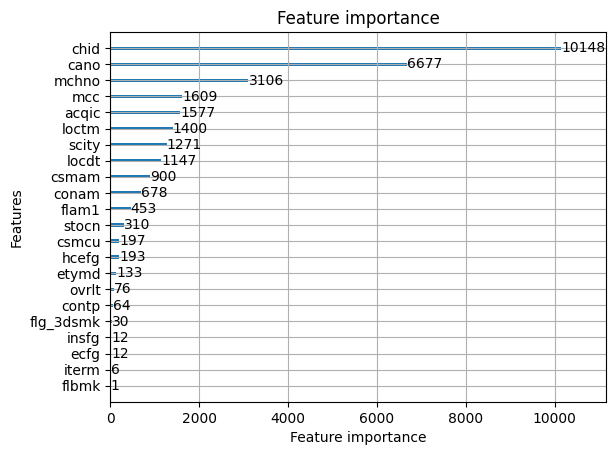

In [24]:
# 獲取特徵重要性
lgb.plot_importance(bst_resampled)

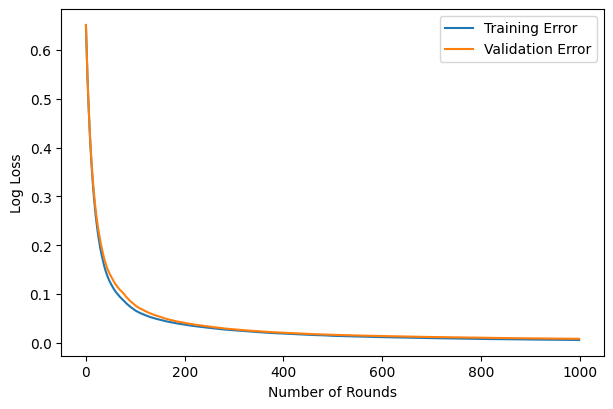

In [25]:
# 獲取訓練和驗證的 error
train_errors = eval_result['training']['binary_logloss']
valid_errors = eval_result['valid_1']['binary_logloss']

# 繪製誤差曲線
plt.figure(figsize=(7, 4.5))
plt.plot(range(len(train_errors)), train_errors, label='Training Error')
plt.plot(range(len(valid_errors)), valid_errors, label='Validation Error')
plt.xlabel('Number of Rounds')
plt.ylabel('Log Loss')
plt.legend()
plt.show()


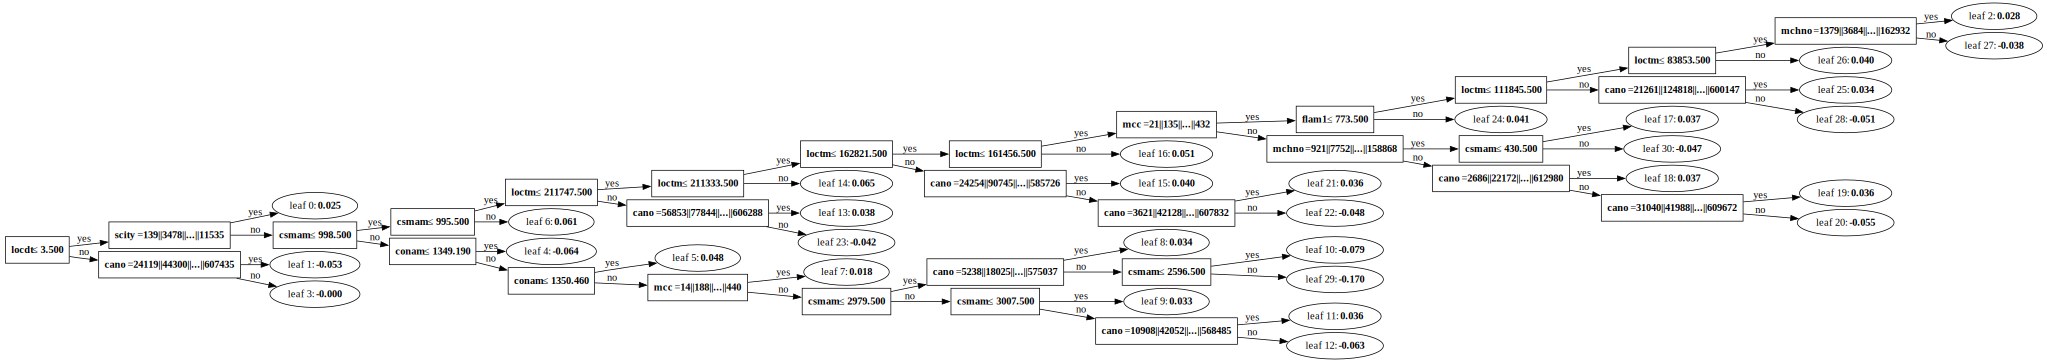

In [7]:
### 把 decision tree畫出來
#lgb.create_tree_digraph(bst_resampled, tree_index=999)

In [20]:
###### 把樹迭代延伸到2000代
## 在這邊測試分數變高一點點(0.01)，但後面用完整數據訓練並上傳後分數變差了。可能再長反而overfit了，算到1000可能差不多
# 創建 RandomOverSampler 對象
oversample = RandomOverSampler(sampling_strategy='minority')

# 在訓練集上應用 Oversampling
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)


# 將 resample 後的數據轉換為 LightGBM 格式
train_data_resampled = lgb.Dataset(X_train_resampled, label=y_train_resampled)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data_resampled)

eval_result = {}

# 設置 LightGBM 參數
params = {
    'objective': 'binary',  # 二元分類問題
    'boosting_type': 'gbdt',  # 使用梯度提升決策樹
    'metric': 'binary_logloss',  # 使用二元對數損失作為評估指標
    'num_leaves': 31,  # 決策樹的葉子數
    'learning_rate': 0.05, # 學習率，控制每個迭代中模型權重的更新幅度
    'feature_fraction': 0.9,  # 特徵抽樣率
    'early_stopping_rounds': 10,  # 早停機制
    'verbose': 500,  # 每 100 個迭代輪數輸出一次訓練過程
    'nthread': 7
}

num_round = 1000  # 最大迭代輪數

bst_resampled = lgb.train(params, train_data_resampled, num_round,
                          valid_sets=[train_data_resampled, test_data],
                          callbacks=[lgb.record_evaluation(eval_result)],
                          init_model=bst_resampled)

# 預測
y_pred_resampled = bst_resampled.predict(X_test, num_iteration=bst_resampled.best_iteration)
y_pred_binary_resampled = (y_pred_resampled > 0.5).astype(int)

# 評估模型性能
accuracy_resampled = accuracy_score(y_test, y_pred_binary_resampled)
print("Accuracy (with resampling):", accuracy_resampled)

# 顯示分類報告
print("Classification Report (with resampling):")
print(classification_report(y_test, y_pred_binary_resampled))


# 計算 PR 曲線
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_resampled)

# 計算 AUC(PR)
area = auc(recall, precision)
print("PR AUC:", area)

# 尋找最佳閾值
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print("Best Threshold:", best_threshold)

# 使用最佳閾值重新分類
y_pred_binary_resampled = (y_pred_resampled > best_threshold).astype(int)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred_binary_resampled)
print("Accuracy:", accuracy)

# 顯示更新的 classification report
print("Updated Classification Report:")
print(classification_report(y_test, y_pred_binary_resampled))



[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 6925126, number of negative: 6925126
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.423786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34499
[LightGBM] [Info] Number of data points in the train set: 13850252, number of used features: 23
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[1262]	training's binary_logloss: 0.00326972	valid_1's binary_logloss: 0.00507321
Accuracy (with resampling): 0.998760434734069
Classification Report (with resampling):
              precision    recall  f1-score   support

           0     

In [24]:
y_pred_resampled = bst_resampled.predict(X_test, num_iteration=bst_resampled.best_iteration)

# 計算 PR 曲線
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_resampled)

# 計算 AUC(PR)
area = auc(recall, precision)
print("PR AUC:", area)

# 尋找最佳閾值
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print("Best Threshold:", best_threshold)

PR AUC: 0.9154702593263602
Best Threshold: 0.9069209493159422


##### All columns but specify categorical feature

In [41]:
# 取得剩下的名稱列表
all_columns = train_df.columns.to_list()

# select categroy columns and without "label"
categorical_columns = [col for col in train_df.columns if train_df[col].dtype == 'category' and col != 'label']

print(categorical_columns)

['chid', 'cano', 'contp', 'etymd', 'mchno', 'acqic', 'mcc', 'ecfg', 'insfg', 'bnsfg', 'stocn', 'scity', 'ovrlt', 'flbmk', 'hcefg', 'csmcu', 'flg_3dsmk']


In [47]:
# 創建 RandomOverSampler 對象
oversample = RandomOverSampler(sampling_strategy='minority')

# 在訓練集上應用 Oversampling
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)


# 將 resample 後的數據轉換為 LightGBM 格式
train_data_resampled = lgb.Dataset(X_train_resampled, categorical_feature=categorical_columns, label=y_train_resampled)
test_data = lgb.Dataset(X_test, label=y_test, categorical_feature=categorical_columns, reference=train_data_resampled)

In [48]:
eval_result = {}

# 設置 LightGBM 參數
params = {
    'objective': 'binary',  # 二元分類問題
    'boosting_type': 'gbdt',  # 使用梯度提升決策樹
    'metric': 'binary_logloss',  # 使用二元對數損失作為評估指標
    'num_leaves': 31,  # 決策樹的葉子數
    'learning_rate': 0.05, # 學習率，控制每個迭代中模型權重的更新幅度
    'feature_fraction': 0.9,  # 特徵抽樣率
    'early_stopping_rounds': 10,  # 早停機制
    'verbose': 500,  # 每 100 個迭代輪數輸出一次訓練過程
    'nthread': 7
}

num_round = 1000  # 最大迭代輪數

bst_resampled = lgb.train(params, train_data_resampled, num_round, valid_sets=[train_data_resampled, test_data], callbacks=[lgb.record_evaluation(eval_result)])

# 預測
y_pred_resampled = bst_resampled.predict(X_test, num_iteration=bst_resampled.best_iteration)
y_pred_binary_resampled = (y_pred_resampled > 0.5).astype(int)

# 評估模型性能
accuracy_resampled = accuracy_score(y_test, y_pred_binary_resampled)
print("Accuracy (with resampling):", accuracy_resampled)

# 顯示分類報告
print("Classification Report (with resampling):")
print(classification_report(y_test, y_pred_binary_resampled))

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 6925126, number of negative: 6925126
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.421084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34585
[LightGBM] [Info] Number of data points in the train set: 13850252, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.0056798	valid_1's binary_logloss: 0.0081668
Accuracy (with resampling): 0.9979910295527552
Classification Report 

In [52]:
# 計算 PR 曲線
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_resampled)

# 計算 AUC(PR)
area = auc(recall, precision)
print("PR AUC:", area)

# 尋找最佳閾值
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print("Best Threshold:", best_threshold)

# 使用最佳閾值重新分類
y_pred_binary_resampled = (y_pred_resampled > best_threshold).astype(int)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred_binary_resampled)
print("Accuracy:", accuracy)

# 顯示更新的 classification report
print("Updated Classification Report:")
print(classification_report(y_test, y_pred_binary_resampled))


PR AUC: 0.903781330041561
Best Threshold: 0.9312891051009896
Accuracy: 0.9990660100155032
Updated Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1731371
           1       0.88      0.86      0.87      6335

    accuracy                           1.00   1737706
   macro avg       0.94      0.93      0.94   1737706
weighted avg       1.00      1.00      1.00   1737706



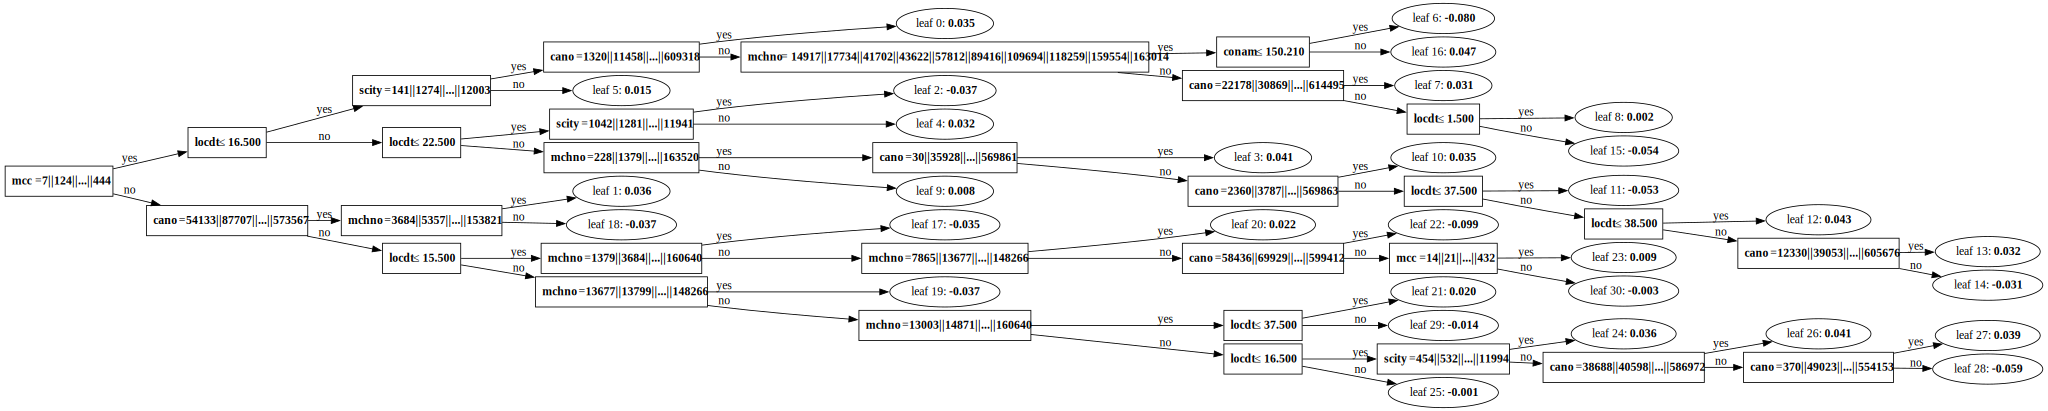

In [51]:
lgb.create_tree_digraph(bst_resampled, tree_index=999)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

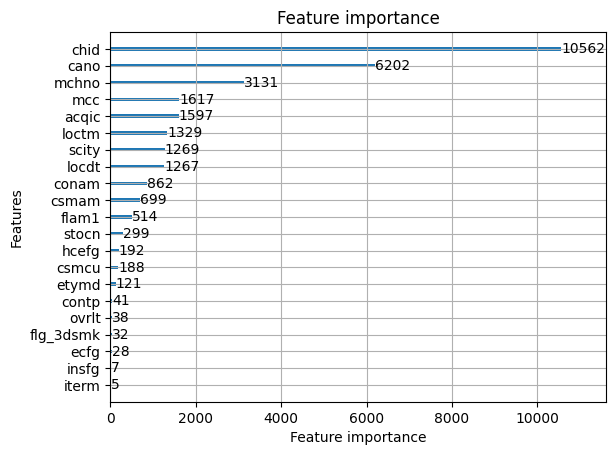

In [53]:
# 獲取特徵重要性
lgb.plot_importance(bst_resampled)

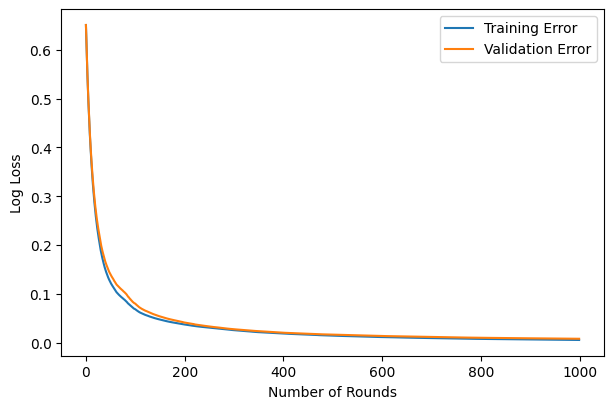

In [54]:
# 獲取訓練和驗證的 error
train_errors = eval_result['training']['binary_logloss']
valid_errors = eval_result['valid_1']['binary_logloss']

# 繪製誤差曲線
plt.figure(figsize=(7, 4.5))
plt.plot(range(len(train_errors)), train_errors, label='Training Error')
plt.plot(range(len(valid_errors)), valid_errors, label='Validation Error')
plt.xlabel('Number of Rounds')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

##### 去除chid(顧客ID)與cano(交易卡號)
註：
資料清理時計算出包含大量唯一值的欄位有
* chid(顧客ID)
* cano(交易卡號)
* mchno(特店代號)
* acqic(收單行代碼)
* stocn(消費地國別)
* scity(消費城市)

In [33]:
X_train.drop(['chid','cano'], axis=1, inplace=True)
X_test.drop(['chid', 'cano'], axis=1, inplace=True)

In [39]:
# 創建 RandomOverSampler 對象
oversample = RandomOverSampler(sampling_strategy='minority')

# 在訓練集上應用 Oversampling
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)


# 將 resample 後的數據轉換為 LightGBM 格式
train_data_resampled = lgb.Dataset(X_train_resampled, label=y_train_resampled)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data_resampled)

eval_result = {}

# 設置 LightGBM 參數
params = {
    'objective': 'binary',  # 二元分類問題
    'boosting_type': 'gbdt',  # 使用梯度提升決策樹
    'metric': 'binary_logloss',  # 使用二元對數損失作為評估指標
    'num_leaves': 31,  # 決策樹的葉子數
    'learning_rate': 0.05, # 學習率，控制每個迭代中模型權重的更新幅度
    'feature_fraction': 0.9,  # 特徵抽樣率
    'early_stopping_rounds': 10,  # 早停機制
    'verbose': 100,  # 每 100 個迭代輪數輸出一次訓練過程
    'nthread': 7
}

num_round = 1000  # 最大迭代輪數

bst_resampled = lgb.train(params, train_data_resampled, num_round, valid_sets=[train_data_resampled, test_data], callbacks=[lgb.record_evaluation(eval_result)])

# 預測
y_pred_resampled = bst_resampled.predict(X_test, num_iteration=bst_resampled.best_iteration)
y_pred_binary_resampled = (y_pred_resampled > 0.5).astype(int)

# 評估模型性能
accuracy_resampled = accuracy_score(y_test, y_pred_binary_resampled)
print("Accuracy (with resampling):", accuracy_resampled)

# 顯示分類報告
print("Classification Report (with resampling):")
print(classification_report(y_test, y_pred_binary_resampled))


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 6925126, number of negative: 6925126
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.248094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9765
[LightGBM] [Info] Number of data points in the train set: 13850252, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.0797545	valid_1's binary_logloss: 0.0945071
Accuracy (with resampling): 0.9575503566195893
Classification Report (

In [40]:
# 計算 PR 曲線
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_resampled)

# 計算 AUC(PR)
area = auc(recall, precision)
print("PR AUC:", area)

# 尋找最佳閾值
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print("Best Threshold:", best_threshold)

# 使用最佳閾值重新分類
y_pred_binary_resampled = (y_pred_resampled > best_threshold).astype(int)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred_binary_resampled)
print("Accuracy:", accuracy)

# 顯示更新的 classification report
print("Updated Classification Report:")
print(classification_report(y_test, y_pred_binary_resampled))


PR AUC: 0.626595141626036
Best Threshold: 0.9826527662623904
Accuracy: 0.9975974071563314
Updated Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1731371
           1       0.73      0.54      0.62      6335

    accuracy                           1.00   1737706
   macro avg       0.86      0.77      0.81   1737706
weighted avg       1.00      1.00      1.00   1737706



<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

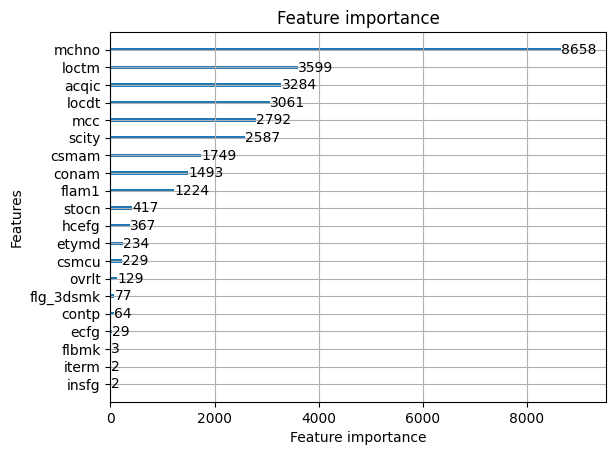

In [41]:
# 獲取特徵重要性
lgb.plot_importance(bst_resampled)

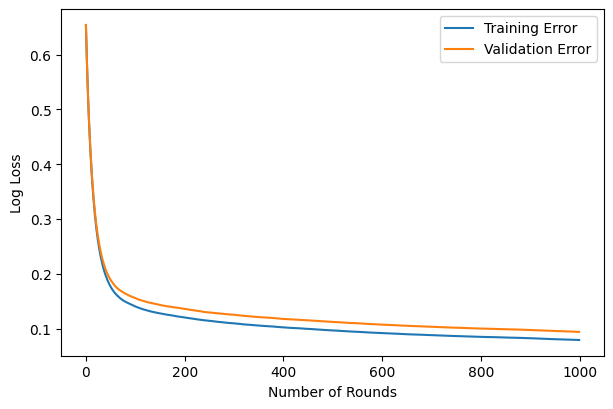

In [42]:
# 獲取訓練和驗證的 error
train_errors = eval_result['training']['binary_logloss']
valid_errors = eval_result['valid_1']['binary_logloss']

# 繪製誤差曲線
plt.figure(figsize=(7, 4.5))
plt.plot(range(len(train_errors)), train_errors, label='Training Error')
plt.plot(range(len(valid_errors)), valid_errors, label='Validation Error')
plt.xlabel('Number of Rounds')
plt.ylabel('Log Loss')
plt.legend()
plt.show()


##### 進一步去除 mchno (特店代號)
註：
資料清理時計算出包含大量唯一值的欄位有
* chid(顧客ID)
* cano(交易卡號)
* mchno(特店代號)
* acqic(收單行代碼)
* stocn(消費地國別)
* scity(消費城市)

In [43]:
X_train.drop('mchno', axis=1, inplace=True)
X_test.drop('mchno', axis=1, inplace=True)

In [44]:
# 創建 RandomOverSampler 對象
oversample = RandomOverSampler(sampling_strategy='minority')

# 在訓練集上應用 Oversampling
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)


# 將 resample 後的數據轉換為 LightGBM 格式
train_data_resampled = lgb.Dataset(X_train_resampled, label=y_train_resampled)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data_resampled)

eval_result = {}

# 設置 LightGBM 參數
params = {
    'objective': 'binary',  # 二元分類問題
    'boosting_type': 'gbdt',  # 使用梯度提升決策樹
    'metric': 'binary_logloss',  # 使用二元對數損失作為評估指標
    'num_leaves': 31,  # 決策樹的葉子數
    'learning_rate': 0.05, # 學習率，控制每個迭代中模型權重的更新幅度
    'feature_fraction': 0.9,  # 特徵抽樣率
    'early_stopping_rounds': 10,  # 早停機制
    'verbose': 100,  # 每 100 個迭代輪數輸出一次訓練過程
    'nthread': 7
}

num_round = 1000  # 最大迭代輪數

bst_resampled = lgb.train(params, train_data_resampled, num_round, valid_sets=[train_data_resampled, test_data], callbacks=[lgb.record_evaluation(eval_result)])

# 預測
y_pred_resampled = bst_resampled.predict(X_test, num_iteration=bst_resampled.best_iteration)
y_pred_binary_resampled = (y_pred_resampled > 0.5).astype(int)

# 評估模型性能
accuracy_resampled = accuracy_score(y_test, y_pred_binary_resampled)
print("Accuracy (with resampling):", accuracy_resampled)

# 顯示分類報告
print("Classification Report (with resampling):")
print(classification_report(y_test, y_pred_binary_resampled))


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 6925126, number of negative: 6925126
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.293900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3554
[LightGBM] [Info] Number of data points in the train set: 13850252, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.0931619	valid_1's binary_logloss: 0.106426
Accuracy (with resampling): 0.9550873392852416
Classification Report (w

In [45]:
# 計算 PR 曲線
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_resampled)

# 計算 AUC(PR)
area = auc(recall, precision)
print("PR AUC:", area)

# 尋找最佳閾值
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print("Best Threshold:", best_threshold)

# 使用最佳閾值重新分類
y_pred_binary_resampled = (y_pred_resampled > best_threshold).astype(int)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred_binary_resampled)
print("Accuracy:", accuracy)

# 顯示更新的 classification report
print("Updated Classification Report:")
print(classification_report(y_test, y_pred_binary_resampled))


PR AUC: 0.6030134043722104
Best Threshold: 0.9785771285206335
Accuracy: 0.9973637657923723
Updated Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1731371
           1       0.67      0.54      0.60      6335

    accuracy                           1.00   1737706
   macro avg       0.83      0.77      0.80   1737706
weighted avg       1.00      1.00      1.00   1737706



<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

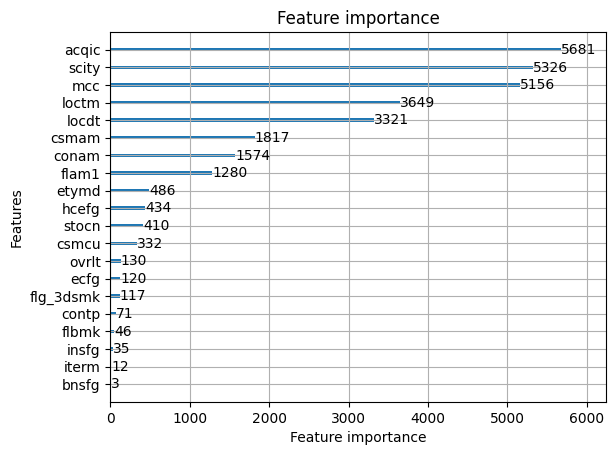

In [46]:
# 獲取特徵重要性
lgb.plot_importance(bst_resampled)

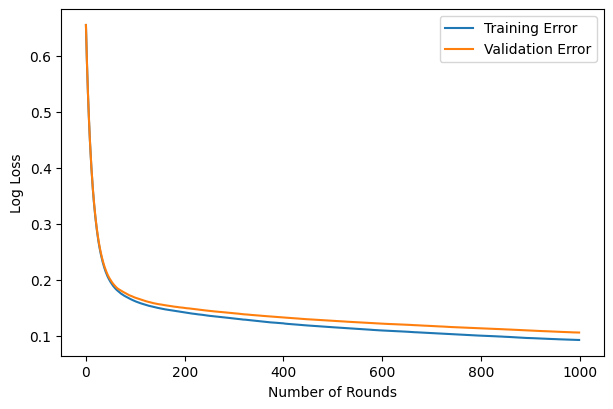

In [47]:
# 獲取訓練和驗證的 error
train_errors = eval_result['training']['binary_logloss']
valid_errors = eval_result['valid_1']['binary_logloss']

# 繪製誤差曲線
plt.figure(figsize=(7, 4.5))
plt.plot(range(len(train_errors)), train_errors, label='Training Error')
plt.plot(range(len(valid_errors)), valid_errors, label='Validation Error')
plt.xlabel('Number of Rounds')
plt.ylabel('Log Loss')
plt.legend()
plt.show()


#### Training: full model, make prediction

未另外指定 categorical variables (但已在pandas指定)

In [19]:
# 儲存
#joblib.dump(bst_resampled, 'lightgbm_model_oversampling_all_data.pkl')

# 加載
bst_resampled = joblib.load('lightgbm_model_oversampling_all_data.pkl')

In [23]:
### 初步資料處理
X = train_df.drop('label', axis=1) # 是否盜刷以外的特徵
y = train_df['label'] # 目標變數：是否盜刷

# 將 y 轉為一維 NumPy 陣列
y = y.to_numpy().reshape(-1)

### 針對少數樣本進行 resample (Oversampling)
# 創建 RandomOverSampler 對象
oversample = RandomOverSampler(sampling_strategy='minority')

# 應用 Oversampling
X_resampled, y_resampled = oversample.fit_resample(X, y)

### LightGBM模型訓練
# 將 resample 後的數據轉換為 LightGBM 格式
all_data_resampled = lgb.Dataset(X_resampled, label=y_resampled)

# 設置 LightGBM 參數
params = {
    'objective': 'binary',  # 二元分類問題
    'boosting_type': 'gbdt',  # 使用梯度提升決策樹
    'metric': 'binary_logloss',  # 使用二元對數損失作為評估指標
    'num_leaves': 31,  # 決策樹的葉子數
    'learning_rate': 0.05, # 學習率，控制每個迭代中模型權重的更新幅度
    'feature_fraction': 0.9,  # 特徵抽樣率
#    'early_stopping_rounds': 10,  # 早停機制
    'verbose': 500,  # 每 100 個迭代輪數輸出一次訓練過程
    'nthread': 7
}

num_round = 1000  # 最大迭代輪數

bst_resampled = lgb.train(params, all_data_resampled, num_round)


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 8656497, number of negative: 8656497
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.374345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 35418
[LightGBM] [Info] Number of data points in the train set: 17312994, number of used features: 23


In [39]:
# 預測
y_pred = bst_resampled.predict(public_df, num_iteration=bst_resampled.best_iteration)

y_pred_binary = (y_pred > 0.9069209493159422).astype(int)

y_pred_binary

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
### 製作上傳檔案
final_df['label'] = y_pred_binary
final_df.to_csv('Submission_3_numround_2000.csv', index=False)

指定 categorical variables

In [20]:
# 儲存
joblib.dump(bst_resampled, 'lightgbm_model_oversampling_nround1500_categorical.pkl')

# 加載
#bst_resampled = joblib.load('lightgbm_model_oversampling_nround1500_categorical.pkl')

['lightgbm_model_oversampling_nround1500_categorical.pkl']

In [19]:
### 初步資料處理
X = train_df.drop('label', axis=1) # 是否盜刷以外的特徵
y = train_df['label'] # 目標變數：是否盜刷

# 取得剩下的名稱列表
all_columns = train_df.columns.to_list()

# select categroy columns and without "label"
categorical_columns = [col for col in train_df.columns if train_df[col].dtype == 'category' and col != 'label']

# 將 y 轉為一維 NumPy 陣列
y = y.to_numpy().reshape(-1)

### 針對少數樣本進行 resample (Oversampling)
# 創建 RandomOverSampler 對象
oversample = RandomOverSampler(sampling_strategy='minority')

# 應用 Oversampling
X_resampled, y_resampled = oversample.fit_resample(X, y)

### LightGBM模型訓練
# 將 resample 後的數據轉換為 LightGBM 格式
all_data_resampled = lgb.Dataset(X_resampled, categorical_feature=categorical_columns, label=y_resampled)

# 設置 LightGBM 參數
params = {
    'objective': 'binary',  # 二元分類問題
    'boosting_type': 'gbdt',  # 使用梯度提升決策樹
    'metric': 'binary_logloss',  # 使用二元對數損失作為評估指標
    'num_leaves': 31,  # 決策樹的葉子數
    'learning_rate': 0.05, # 學習率，控制每個迭代中模型權重的更新幅度
    'feature_fraction': 0.9,  # 特徵抽樣率
#    'early_stopping_rounds': 10,  # 早停機制
    'verbose': 500,  # 每 100 個迭代輪數輸出一次訓練過程
    'nthread': 7
}

num_round = 1500  # 最大迭代輪數

bst_resampled = lgb.train(params, all_data_resampled, num_round)

# 預測
y_pred = bst_resampled.predict(public_df, num_iteration=bst_resampled.best_iteration)

y_pred_binary = (y_pred > 0.9312891051009896).astype(int)

print(y_pred_binary)
print('---Prediction finished---')

### 製作上傳檔案
final_df['label'] = y_pred_binary
final_df.to_csv('Submission_4_numround_1500_cat.csv', index=False)

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 8656497, number of negative: 8656497
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.356379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 35463
[LightGBM] [Info] Number of data points in the train set: 17312994, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[0 0 0 ... 0 0 0]
---Prediction finished---


### LightGBM model-3: Oversamping + boosting_type=rf

In [21]:
# 創建 RandomOverSampler 對象
oversample = RandomOverSampler(sampling_strategy='minority')

# 在訓練集上應用Oversamping
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)

# 將 resample 過的數據轉成 LightGBM 格式
train_data_resampled = lgb.Dataset(X_train_resampled, label=y_train_resampled)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data_resampled)

# 設置 LightGBM 參數
params = {
    'objective': 'binary',  # 二元分類問題
    'boosting_type': 'rf',  # 使用隨機森林決策樹
    'metric': 'binary_logloss',  # 使用二元對數損失作為評估指標
    'num_leaves': 31,  # 決策樹的葉子數
    'learning_rate': 0.05, # 學習率，控制每個迭代中模型權重的更新幅度
    'feature_fraction': 0.9,  # 特徵抽樣率
    'early_stopping_rounds': 10,  # 早停機制
    'verbose': 500,  # 每 100 個迭代輪數輸出一次訓練過程
    'nthread': 7
}

num_round = 1000  # 最大迭代輪數

bst_resampled_rf = lgb.train(params, train_data_resampled, num_round, valid_sets=[test_data])

# 預測
y_pred_resampled_rf = bst_resampled_rf.predict(X_test, num_iteration=bst_resampled_rf.best_iteration)
y_pred_binary_resampled_rf = (y_pred_resampled_rf > 0.5).astype(int)

# 評估模型性能
accuracy_resampled_rf = accuracy_score(y_test, y_pred_binary_resampled_rf)
print("Accuracy (with resampling and rf boosting):", accuracy_resampled_rf)

# 顯示分類報告
print("Classification Report (with resampling and rf boosting):")
print(classification_report(y_test, y_pred_binary_resampled_rf))


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 6925126, number of negative: 6925126
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.487958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34327
[LightGBM] [Info] Number of data points in the train set: 13850252, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.227641
Accuracy (with resampling and rf boosting): 0.9301251189786995
Classification Report (with resampling and rf boosting):
  

In [11]:
# 計算 PR 曲線
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_resampled_rf)

# 計算 AUC(PR)
area = auc(recall, precision)
print("PR AUC:", area)

# 尋找最佳閾值
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print("Best Threshold:", best_threshold)

# 使用最佳閾值重新分類
y_pred_binary_resampled_rf = (y_pred_resampled_rf > best_threshold).astype(int)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred_binary_resampled_rf)
print("Accuracy:", accuracy)

# 顯示更新的 classification report
print("Updated Classification Report:")
print(classification_report(y_test, y_pred_binary_resampled_rf))


PR AUC: 0.35227280095944163
Best Threshold: 0.8666052715387158
Accuracy: 0.9913575714188706
Updated Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1731371
           1       0.22      0.55      0.32      6335

    accuracy                           0.99   1737706
   macro avg       0.61      0.77      0.66   1737706
weighted avg       1.00      0.99      0.99   1737706



### LightGMB model-4: Undersampling -> Oversampling

#### Undersampling = 0.05

In [55]:
# 儲存
joblib.dump(bst_resampled, 'lightgbm_model_4_under_over_sampling.pkl')

# 加載
#loaded_model = joblib.load('lightgbm_model_4_under_over_sampling.pkl')

['lightgbm_model_4_under_over_sampling.pkl']

In [53]:
# 創建 RandomUnderSampler 和 RandomOverSampler
under_sampler = RandomUnderSampler(sampling_strategy=0.05)  # Ｎ少數/N多數的值，所以數字越大刪掉越多多數樣本
over_sampler = RandomOverSampler(sampling_strategy=1.0)  # 這裡使用 1.0 表示將少數類別的數量增加到和多數類別相等

# 創建 Pipeline，按照順序應用 Undersampling 和 Oversampling
pipeline = Pipeline([
    ('under_sampling', under_sampler),
    ('over_sampling', over_sampler)
])

# 使用 Pipeline 來處理訓練數據
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# 將 resample 過的數據轉成 LightGBM 格式
train_data_resampled = lgb.Dataset(X_train_resampled, label=y_train_resampled)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data_resampled)

# 設置 LightGBM 參數
params = {
    'objective': 'binary',  # 二元分類問題
    'boosting_type': 'gbdt',  # 使用梯度提升決策樹
    'metric': 'binary_logloss',  # 使用二元對數損失作為評估指標
    'num_leaves': 31,  # 決策樹的葉子數
    'learning_rate': 0.05, # 學習率，控制每個迭代中模型權重的更新幅度
    'feature_fraction': 0.9,  # 特徵抽樣率
    'early_stopping_rounds': 10,  # 早停機制
    'verbose': 500,  # 每 100 個迭代輪數輸出一次訓練過程
    'nthread': 7
}

num_round = 1000  # 最大迭代輪數

bst_resampled = lgb.train(params, train_data_resampled, num_round, valid_sets=[test_data])

# 預測
y_pred_resampled = bst_resampled.predict(X_test, num_iteration=bst_resampled.best_iteration)
y_pred_binary_resampled = (y_pred_resampled > 0.5).astype(int)

# 評估模型性能
accuracy_resampled = accuracy_score(y_test, y_pred_binary_resampled)
print("Accuracy (with resampling):", accuracy_resampled)

# 顯示分類報告
print("Classification Report (with resampling):")
print(classification_report(y_test, y_pred_binary_resampled))


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 513880, number of negative: 513880
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34753
[LightGBM] [Info] Number of data points in the train set: 1027760, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.0120218
Accuracy (with resampling): 0.9968159170768818
Classification Report (with resampling):
              precisi

In [54]:
# 計算 PR 曲線
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_resampled)

# 計算 AUC(PR)
area = auc(recall, precision)
print("PR AUC:", area)

# 尋找最佳閾值
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print("Best Threshold:", best_threshold)

# 使用最佳閾值重新分類
y_pred_binary_resampled = (y_pred_resampled > best_threshold).astype(int)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred_binary_resampled)
print("Accuracy:", accuracy)

# 顯示更新的 classification report
print("Updated Classification Report:")
print(classification_report(y_test, y_pred_binary_resampled))


PR AUC: 0.8789006098976427
Best Threshold: 0.9810039918274204
Accuracy: 0.9989181138811744
Updated Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1731371
           1       0.86      0.83      0.85      6335

    accuracy                           1.00   1737706
   macro avg       0.93      0.92      0.92   1737706
weighted avg       1.00      1.00      1.00   1737706



#### UnderSampling = 0.3

In [52]:
#len(X_train_resampled)

171292

In [50]:
# 創建 RandomUnderSampler 和 RandomOverSampler
under_sampler = RandomUnderSampler(sampling_strategy=0.3)  # Ｎ少數/N多數的值，所以數字越大刪掉越多多數樣本
over_sampler = RandomOverSampler(sampling_strategy=1.0)  # 這裡使用 1.0 表示將少數類別的數量增加到和多數類別相等

# 創建 Pipeline，按照順序應用 Undersampling 和 Oversampling
pipeline = Pipeline([
    ('under_sampling', under_sampler),
    ('over_sampling', over_sampler)
])

# 使用 Pipeline 來處理訓練數據
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# 將 resample 過的數據轉成 LightGBM 格式
train_data_resampled = lgb.Dataset(X_train_resampled, label=y_train_resampled)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data_resampled)

# 設置 LightGBM 參數
params = {
    'objective': 'binary',  # 二元分類問題
    'boosting_type': 'gbdt',  # 使用梯度提升決策樹
    'metric': 'binary_logloss',  # 使用二元對數損失作為評估指標
    'num_leaves': 31,  # 決策樹的葉子數
    'learning_rate': 0.05, # 學習率，控制每個迭代中模型權重的更新幅度
    'feature_fraction': 0.9,  # 特徵抽樣率
    'early_stopping_rounds': 10,  # 早停機制
    'verbose': 500,  # 每 100 個迭代輪數輸出一次訓練過程
    'nthread': 7
}

num_round = 1000  # 最大迭代輪數

bst_resampled = lgb.train(params, train_data_resampled, num_round, valid_sets=[test_data])

# 預測
y_pred_resampled = bst_resampled.predict(X_test, num_iteration=bst_resampled.best_iteration)
y_pred_binary_resampled = (y_pred_resampled > 0.5).astype(int)

# 評估模型性能
accuracy_resampled = accuracy_score(y_test, y_pred_binary_resampled)
print("Accuracy (with resampling):", accuracy_resampled)

# 顯示分類報告
print("Classification Report (with resampling):")
print(classification_report(y_test, y_pred_binary_resampled))


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 85646, number of negative: 85646
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31050
[LightGBM] [Info] Number of data points in the train set: 171292, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[719]	valid_0's binary_logloss: 0.0293285
Accuracy (with resampling): 0.9917224202483044
Classification Report (with resampling):
              precision    recall  f1-

In [51]:
# 計算 PR 曲線
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_resampled)

# 計算 AUC(PR)
area = auc(recall, precision)
print("PR AUC:", area)

# 尋找最佳閾值
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print("Best Threshold:", best_threshold)

# 使用最佳閾值重新分類
y_pred_binary_resampled = (y_pred_resampled > best_threshold).astype(int)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred_binary_resampled)
print("Accuracy:", accuracy)

# 顯示更新的 classification report
print("Updated Classification Report:")
print(classification_report(y_test, y_pred_binary_resampled))


PR AUC: 0.7566750538961595
Best Threshold: 0.9863139599213638
Accuracy: 0.9977982466539219
Updated Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1731371
           1       0.67      0.79      0.72      6335

    accuracy                           1.00   1737706
   macro avg       0.83      0.89      0.86   1737706
weighted avg       1.00      1.00      1.00   1737706

